In [1]:
import numpy as np
import tensorflow as tf
import Image_util as IU
from VGG19 import VGG19
from Stylizer import Stylizer
import matplotlib.pyplot as plt

In [2]:
#loading pre training model

model_file_name = "imagenet-vgg-verydeep-19.mat"
VGG19_model = VGG19(model_file_name)

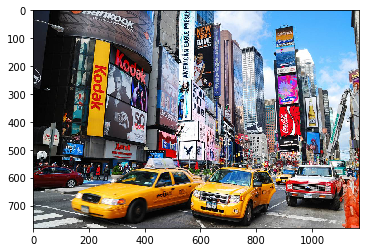

In [3]:
#load content image
content_img = IU.image_loader("images/new_york.jpg")
IU.image_single(content_img)

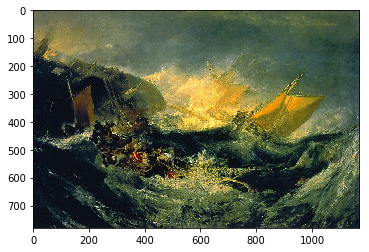

In [4]:
#load style image
style_img = IU.image_loader("images/shipwreck.jpg",shape=(content_img.shape[2],content_img.shape[1]))
IU.image_single(style_img)

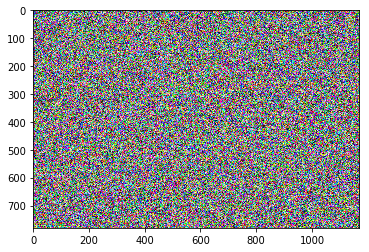

In [5]:
#initialize generation image
initial_type = "random"
if initial_type == 'content':
    init_img = content_img
elif initial_type == 'style':
    init_img = style_img
elif initial_type == 'random':
    init_img = np.random.normal(size=content_img.shape, scale=np.std(content_img))
IU.image_single(init_img)

In [6]:
#create mapping
content_layer_names = ["conv4_2"]
content_layer_weights = [1.0]
content_layers = {}
for layer_name, weight in zip(content_layer_names, content_layer_weights):
    content_layers[layer_name] = weight
    
style_layer_names = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
style_layer_weights = [0.0, 0.0, 0.0, 1, 0.0]
style_layers = {}
for layer_name, weight in zip(style_layer_names, style_layer_weights):
    style_layers[layer_name] = weight


In [7]:
#CNN running

sess_1 = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
gen_Stylizer = Stylizer(session=sess_1,
                       content_image=content_img,
                       style_image=style_img,
                       init_image=init_img,
                       ids_content=content_layers,
                       ids_style=style_layers,
                       network=VGG19_model,
                       iteration=1000,
                       loss_ratio=1e-3,
                       norm=3,
                       optm="L-BFGS")

output_img, loss_hist_1 = gen_Stylizer.update()

sess_1.close()

1000
For iteration: 0, total loss: 1604312500000.0, content loss: 1602709800.0, style loss: 138257890000.0
For iteration: 100, total loss: 29333103000.0, content loss: 29303800.0, style loss: 16353185000.0
For iteration: 200, total loss: 17275650000.0, content loss: 17258392.0, style loss: 15274592000.0
For iteration: 300, total loss: 11837616000.0, content loss: 11825790.0, style loss: 14610820000.0
For iteration: 400, total loss: 8971501000.0, content loss: 8962538.0, style loss: 14201291000.0
For iteration: 500, total loss: 7303673300.0, content loss: 7296377.0, style loss: 13886615000.0
For iteration: 600, total loss: 6155182000.0, content loss: 6149033.0, style loss: 13663103000.0
For iteration: 700, total loss: 5294893600.0, content loss: 5289604.0, style loss: 13486582000.0
For iteration: 800, total loss: 4595533300.0, content loss: 4590942.0, style loss: 13350879000.0
For iteration: 900, total loss: 4015664600.0, content loss: 4011652.8, style loss: 13232622000.0
For iteration:

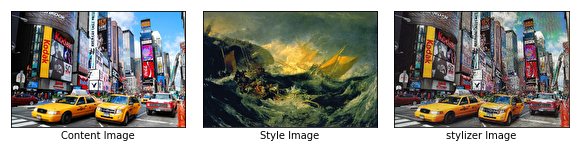

In [8]:
#showing result image
output_shape = output_img.shape
result_img = np.reshape(output_img, output_shape[1:])
IU.save_image(result_img, "result/result_NYC_ship_Conv41s_1e-3.jpg")
c_img = np.reshape(content_img, content_img.shape[1:])
s_img = np.reshape(style_img, style_img.shape[1:])
IU.image_plotting(c_img, s_img, result_img)

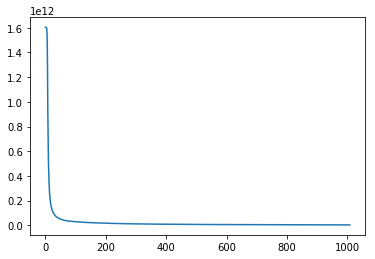

In [9]:
#poltting loss decreasing

plt.plot(loss_hist_1, label="L-BFGS")
plt.show()